 ## **Introduction**

---



#                            Diabetic Retinopathy detection using Deep learning

---


                         
                         
  Diabetic retinopathy is an disease of eye caused to an person due to diabetes,it is the condition in which person's eye is damaged due to mellitus present in human eye. It is basically occurs when the blood form several droplets on to the retina and it remain collected at that perticular place and this affect the person and if it occur in more extent then an person can lead towards blindliness due to the cause called Diabetic Rectinopathy.
   present in human eye.
  
>![](http://www.koreabiomed.com/news/photo/201710/1687_1860_3515.gif) 










here is an image of an normal person retina image and in front of it an image of an person having diabetic rectinopathy.




> ![](https://afamilyoptician.co.uk/wp-content/uploads/2017/05/diabetic-retinopathy-v01.png)


---



# Diabetic rectinopathy has several stages

---




0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR


---


# Content


---



* Over 285 million peoples are suffering from Diabetic rectinopathy world wide out of which 31.7 million from india alone.

* Approximately 1 in 3 people living with diabetes have some degree of DR and 1 in 10 will develop a vision threatening form of the disease. DR is the leading cause of vision loss in working age adults (20- 65 years).

* In front of this there are very few doctors to analize the disease.

* So Deep learning can help to solve this problem
here is an model that predicts whether an person has diabetic rectiopathy or not on the basis of there retina images.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
     #   print(os.path.join(dirname, filename))
files = os.listdir("../input")
print(files)
print('trainlabels.csv' in files)
print(len(files))
# Any results you write to the current directory are saved as output.

['fastai-pretrained-models', 'unknown', 'aptos2019-blindness-detection', 'resnet101']
False
4


# **Importing required libraries**


---



First of all import the required libraries
I am using fastai library for my project at this time as this an type of image classification problem I am using fatai.vision to solve the problem.

In [2]:
from fastai import *
from fastai.vision import *
import matplotlib as plt
import pandas as pd
from fastai.widgets import ClassConfusion
from fastai.widgets import *

> Checking if an GPU is enabled or not
Make sure that cuda is installed and is available.

In [3]:
print('Make sure cuda is installed:', torch.cuda.is_available())
print('Make sure cudnn is enabled:', torch.backends.cudnn.enabled)

Make sure cuda is installed: True
Make sure cudnn is enabled: True


# **Reading the data**


---


Read the data which is given in an csv 

In [4]:
train_df =  pd.read_csv("../input/aptos2019-blindness-detection/train.csv")
valid_df =  pd.read_csv("../input/aptos2019-blindness-detection/test.csv")


Look at the data i.e dataframe of train images and also for the test images.

In [5]:
train_df.head(10)

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


In [6]:
valid_df.head(10)

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4
5,009c019a7309
6,010d915e229a
7,0111b949947e
8,01499815e469
9,0167076e7089


> Look through the training data

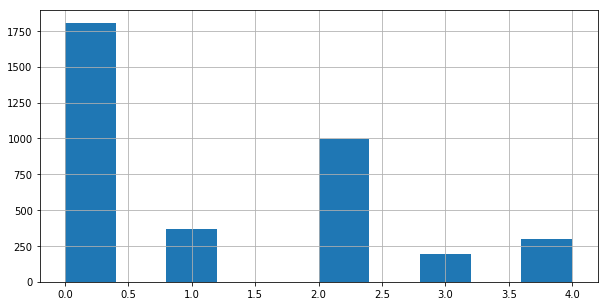

In [7]:
train_df['diagnosis'].hist(figsize = (10, 5))


# **Transforming the images**


---



Transforming the images for bettor model training 


Transform the images of same type
Example all the images are initially not of the same size and shape so we have to transform them in specific order for the better trainig the neural network.
Here it rotate the image either vertical or flip or zoom it according to its need.

In [8]:
#tfms = get_tranforms(do_flip=True,)
tfms=get_transforms(do_flip = True,flip_vert = True,max_rotate=360,max_zoom = 1.1)



# **Creating Databunch**


---


1. Now the data is ready to Bunch them together to fit the model for Trainig.
2. Here I use ImageList to bunch them together.
3. Am also splitting them by and random.
4.  labbelling them according to the indexes.
5.  and finnaly normalize them here normalization means arranging the things in specific order 

In [9]:
data = (ImageList.from_df(train_df,"../input/aptos2019-blindness-detection/train_images",suffix='.png').
       split_by_rand_pct(0.1).
       label_from_df(1).
       transform(tfms,size=256).
       databunch(bs = 16).
       normalize(imagenet_stats))

> Display the data
look at the images after listing them together according to the batch size.
* Example if I choose batch size of 16 then the first 16 images will be shown here.

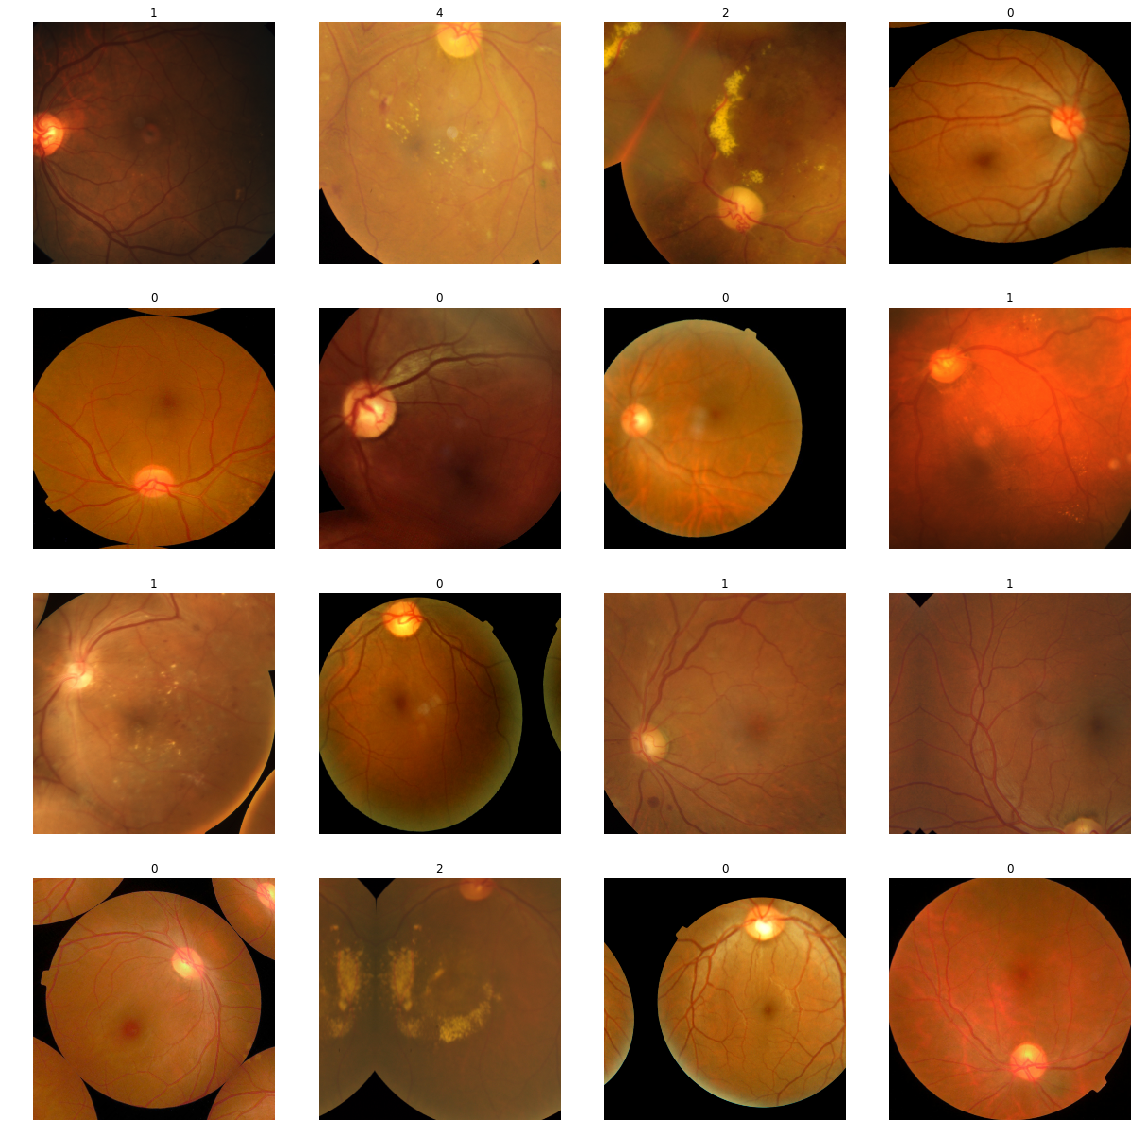

In [10]:
data.show_batch()

# **Creating an learner**


---


making an Architecture
create learn(A object for the neural network) here I am choosing Pretrained Model resnet101 for my problem to solve.

In [11]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy,model_dir="/kaggle/working")


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:00<00:00, 181MB/s]


# **Learning Rate finder**


---


For finding appropriate learning rate we go through the data once and plot the graph of it.

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


plot the graph of learning rate finder.

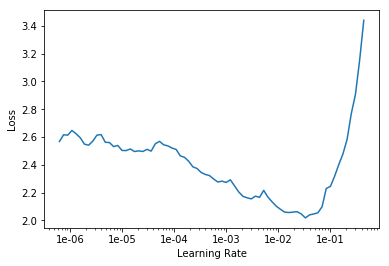

In [13]:
learn.recorder.plot()

# **Model Training**


---



Here learning rate is slice(2e-5,2e-3) which means first layer will have the learning rate as 2e-5 and last layer(not an output layer) will have learning rate of 2e-3 other all hidden layers will have learning rate of in between 2e-5 to 2e-3

In [14]:
learn.fit_one_cycle(5,slice(2e-5,2e-3),wd=0.1,moms=(0.8,0.9))

epoch,train_loss,valid_loss,accuracy,time
0,1.267836,0.821119,0.745902,08:44
1,0.859298,0.651925,0.765027,08:44
2,0.764958,0.614341,0.775956,08:33
3,0.591104,0.526098,0.795082,08:38
4,0.624181,0.520665,0.797814,08:43


Train a bit more

In [15]:
learn.fit_one_cycle(2,max_lr=slice(2.5e-3),wd=0.1,moms=(0.8,0.9))

epoch,train_loss,valid_loss,accuracy,time
0,0.705540,0.604712,0.765027,08:37
1,0.611050,0.508060,0.806011,08:41


In [16]:
learn.fit_one_cycle(2,slice(2.5e-5),wd=0.01,moms=(0.8,0.9))

epoch,train_loss,valid_loss,accuracy,time
0,0.550373,0.493204,0.811475,08:40
1,0.536637,0.496796,0.806011,08:48


In [17]:
learn.fit_one_cycle(6,max_lr=slice(1e-3,1e-4),wd=0.1,moms=0.9)

epoch,train_loss,valid_loss,accuracy,time
0,0.533358,0.482195,0.819672,08:42
1,0.585513,0.494200,0.811475,08:44
2,0.537729,0.492189,0.827869,08:38
3,0.485906,0.551792,0.833333,08:39
4,0.484729,0.519014,0.836066,08:44
5,0.513222,0.517917,0.833333,08:41


# **Save the model**


---


Now we got enough accurate results so save the Trained weights.

In [18]:
learn.save('stage-1')

Loading the Trained Model named "stage-1"

In [19]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3296 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
2,4,1,0,0
Path: ../input/aptos2019-blindness-detection/train_images;

Valid: LabelList (366 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
3,0,0,0,2
Path: ../input/aptos2019-blindness-detection/train_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

Freeze the weights for not furthur modification

In [20]:
learn.freeze()

# **Plot the losses**


---



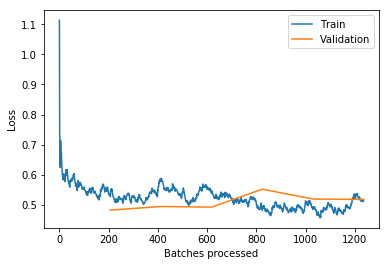

In [21]:
learn.recorder.plot_losses()

show results will display the result of any batch in this case first batch.

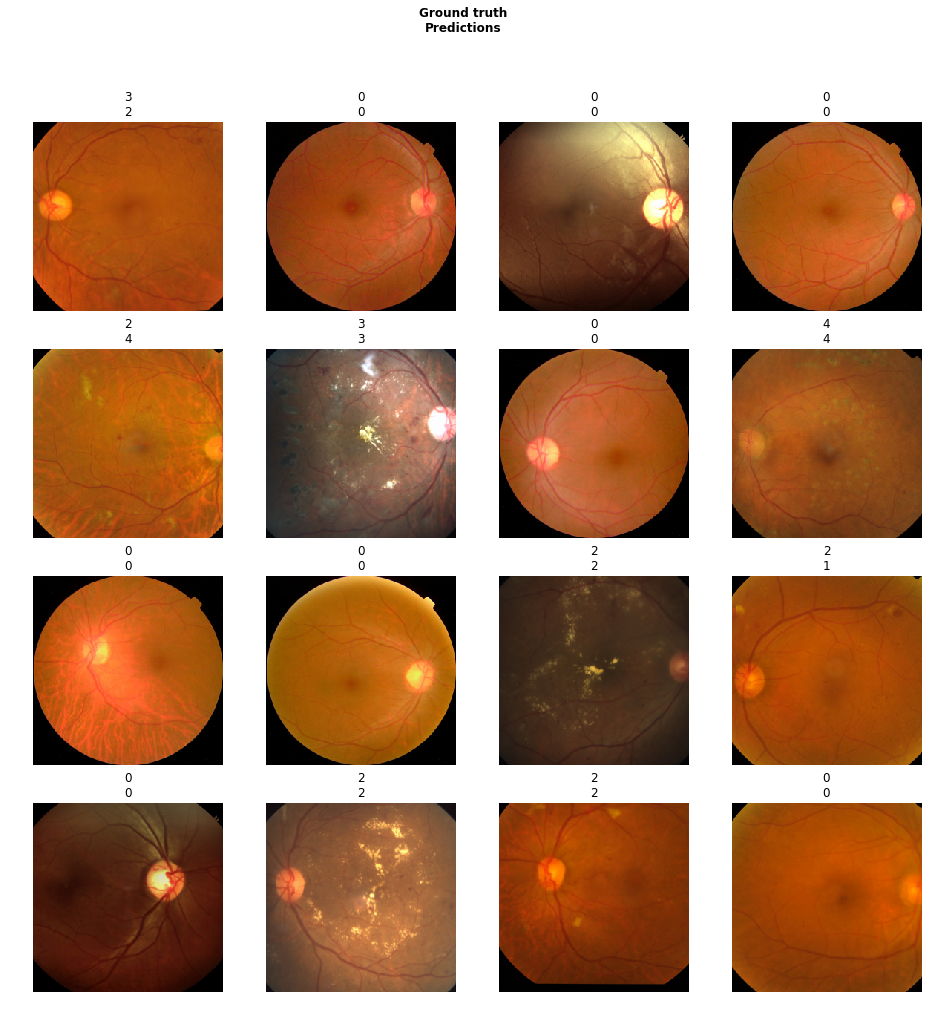

In [22]:
learn.show_results()

show all predictions of Test data

In [23]:
learn.get_preds()

[tensor([[8.8236e-04, 1.0454e-01, 7.9225e-01, 2.5982e-02, 7.6352e-02],
         [9.9953e-01, 1.5505e-04, 3.4999e-05, 2.3176e-04, 5.2417e-05],
         [9.9283e-01, 8.9160e-04, 3.5340e-03, 2.1215e-03, 6.2622e-04],
         ...,
         [9.9160e-01, 6.1083e-03, 1.3677e-03, 5.3855e-04, 3.8492e-04],
         [9.9973e-01, 1.6824e-04, 1.0841e-05, 4.3670e-05, 4.3508e-05],
         [9.6946e-01, 2.3110e-02, 2.3118e-03, 3.3018e-03, 1.8196e-03]]),
 tensor([3, 0, 0, 0, 2, 3, 0, 4, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 2, 0, 0, 0, 1, 4, 2, 0, 0, 0, 4, 0, 2, 1, 0, 0, 4, 0, 2, 2, 0, 3,
         0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 3, 1, 2,
         0, 2, 2, 4, 4, 0, 2, 2, 2, 0, 3, 1, 4, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2,
         2, 2, 2, 0, 4, 4, 0, 1, 2, 1, 0, 2, 2, 2, 4, 0, 0, 2, 4, 0, 4, 3, 0, 2,
         2, 0, 2, 1, 0, 0, 0, 2, 0, 3, 1, 0, 0, 2, 3, 2, 4, 2, 2, 4, 0, 4, 2, 0,
         0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 4, 2, 0, 0, 0, 2, 1, 0, 0, 2, 1, 

> ClassificationInterpretation

# **Classification Interpretation**


---



In [24]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

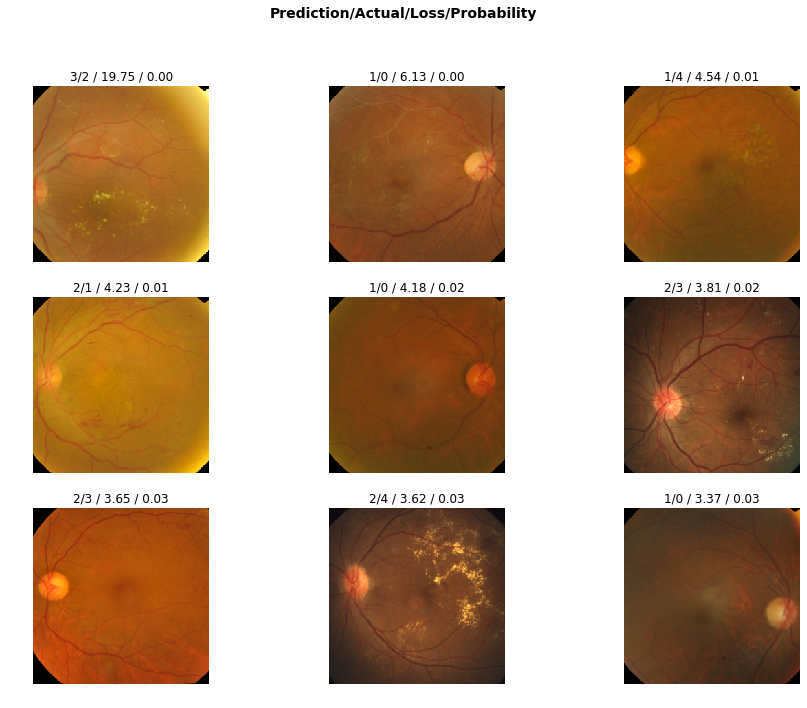

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

# **Confusion matrix**


---



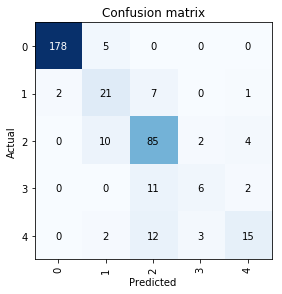

In [26]:
interp.plot_confusion_matrix()

# **Most confused**


---



In [27]:
interp.most_confused()

[(4, 2, 12),
 (3, 2, 11),
 (2, 1, 10),
 (1, 2, 7),
 (0, 1, 5),
 (2, 4, 4),
 (4, 3, 3),
 (1, 0, 2),
 (2, 3, 2),
 (3, 4, 2),
 (4, 1, 2),
 (1, 4, 1)]

> Transforming the images for prediction

In [28]:
Tf = partial(Image.apply_tfms,tfms=get_transforms(do_flip=True, flip_vert = True)[0][1:]+get_transforms(do_flip=True, flip_vert = True)[1],size = 512)  

# **Reading the submission.csv file**


---



In [29]:
sub = pd.read_csv("../input/aptos2019-blindness-detection/sample_submission.csv")

In [30]:
print(sub)

           id_code  diagnosis
0     0005cfc8afb6          0
1     003f0afdcd15          0
2     006efc72b638          0
3     00836aaacf06          0
4     009245722fa4          0
...            ...        ...
1923  ff2fd94448de          0
1924  ff4c945d9b17          0
1925  ff64897ac0d8          0
1926  ffa73465b705          0
1927  ffdc2152d455          0

[1928 rows x 2 columns]


# **Testing on an single image**


---



In [31]:
img = open_image("../input/aptos2019-blindness-detection/test_images/020f6983114d.png")
pre = learn.predict(img)
x = pre[1]
x = int(x)
print(x)

2


> Predicting the images and writting the prediction on submission.csv file for submission

In [ ]:

for i in range(len(sub.id_code)):
    s=0
    id = sub.id_code[i]
    img=open_image("../input/aptos2019-blindness-detection/test_images/"+sub.id_code[i]+".png")
    """
    for i in range(10):
            Img = Tf(img)
            p = learn.predict(Img)
            p = p[1]
            p = int(p)
            #print(p) 
            s=s+p
    """
            
    Img = Tf(img)
    s = learn.predict(Img)
    s = s[1]
    s = int(s)
    #print(s)
    sub.diagnosis[i]=s
    #print(sub.diagnosis[i])

In [33]:

sub.to_csv("submission.csv",index=False)

# **Submission.csv file**


---



In [34]:
 print(sub) 

           id_code  diagnosis
0     0005cfc8afb6          1
1     003f0afdcd15          2
2     006efc72b638          2
3     00836aaacf06          2
4     009245722fa4          3
...            ...        ...
1923  ff2fd94448de          0
1924  ff4c945d9b17          2
1925  ff64897ac0d8          2
1926  ffa73465b705          2
1927  ffdc2152d455          0

[1928 rows x 2 columns]
